In [129]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [130]:
data = pd.read_csv('temp_mean_data/merged_files.csv')
data


,date,temperature(k)
0,1981-01-01,273.830
1,1981-01-02,274.172
2,1981-01-03,273.739
3,1981-01-04,273.635
4,1981-01-05,272.250
...,...,...
12037,2013-12-26,272.592
12038,2013-12-27,272.947
12039,2013-12-28,271.847
12040,2013-12-29,271.631


In [152]:
x = data['temperature(k)'].head(365)
y = x.to_numpy()
y.shape

(365,)

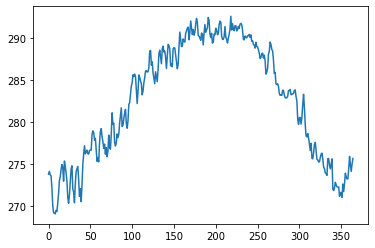

In [147]:
plt.plot(y)

In [148]:
from scipy.signal import savgol_filter

In [161]:
new_data = savgol_filter(y, 9, 2)

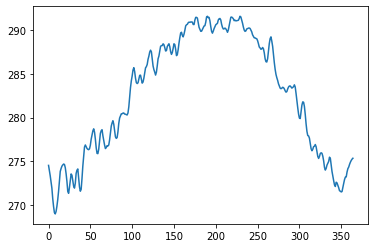

In [162]:
plt.plot(new_data)

In [181]:
r = np.array(range(0,365))
t = pd.DataFrame(r,columns=['index'])
u = t[['index']]
i = t.to_numpy()

In [182]:
q = pd.DataFrame(new_data,columns=['temp'])
w = q[['temp']]
e = w.to_numpy()

In [183]:
X_train,X_test,y_train,y_test = train_test_split(e,i,test_size=0.2)

In [184]:
lr = LinearRegression()

In [185]:
lr.fit(X_train,y_train)

LinearRegression()

In [186]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
# y_test.shape

In [187]:
 r2_score(y_test,y_pred)


-0.030368154167120798

In [188]:
# plt.plot(y_test,y_pred,color='r')
# plt.plot(a,c,"b.")
# y_test.shape


# a.shape
# type(X_train)

In [189]:
poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [191]:
print(X_train[0])
X_train_trans[0]

[273.9591645]


array([1.00000000e+00, 2.73959165e+02, 7.50536238e+04])

In [192]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [193]:
y_pred = lr.predict(X_test_trans)